### ***Configure GPU***

In [63]:
import tensorflow as tf              
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

### ***Load Dataset***

*i) Import the Data from Directory*

In [64]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 1520 files belonging to 2 classes.


*ii) Confirm Correct Class Labels are Assigned*

In [65]:
batch=data.as_numpy_iterator().next()

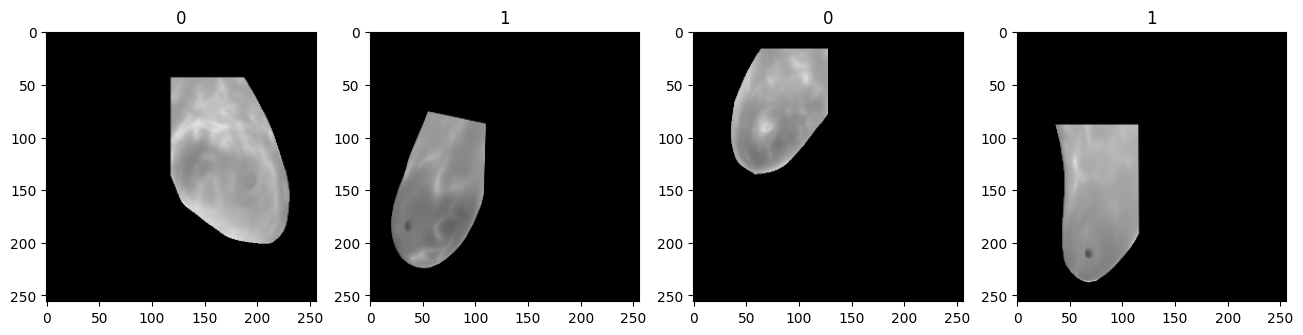

In [66]:
import matplotlib.pyplot as plt           
fig,ax=plt.subplots(ncols=4,figsize=(16,6))
for index,image in enumerate(batch[0][:4]):
    ax[index].imshow(image.astype(int))
    ax[index].title.set_text(batch[1][index])
plt.show()

### ***Data Preprocessing***

*i) Scale the Data*

In [67]:
scaled_data=data.map(lambda X,y:(X/255,y))

In [68]:
scaled_batch=scaled_data.as_numpy_iterator().next()

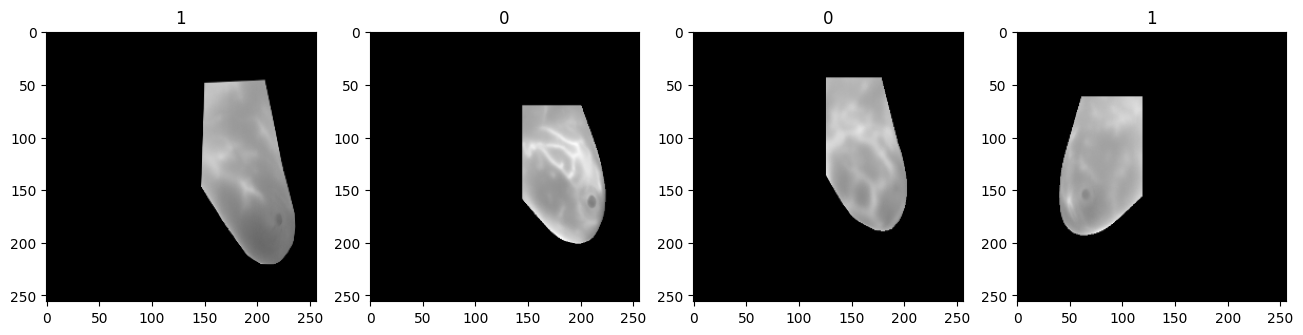

In [69]:
fig,ax=plt.subplots(ncols=4,figsize=(16,6))
for index,image in enumerate(scaled_batch[0][:4]):
    ax[index].imshow(image)
    ax[index].title.set_text(scaled_batch[1][index])

*ii) Split the Data*

In [70]:
len(scaled_data)

48

In [71]:
train_size=int(len(scaled_data)*.85)
val_size=int(len(scaled_data)*.105)
test_size=int(len(scaled_data)*.07)

In [72]:
train=scaled_data.take(train_size)
val=scaled_data.skip(train_size).take(val_size)
test=scaled_data.skip(train_size + val_size).take(test_size)

### ***Model Development***

In [73]:
from tensorflow import keras 

*i) Initialize Model*

In [74]:
model=keras.Sequential()

In [75]:
model.add(keras.layers.Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Conv2D(32,(3,3),1,activation='relu'))
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Conv2D(64,(3,3),1,activation='relu'))
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [76]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 64)       

*ii) Compile Model*

In [77]:
model.compile(
    optimizer='adam',
    loss=tf.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [78]:
early=tf.keras.callbacks.EarlyStopping(
    min_delta=0.01,
    patience=5,
    restore_best_weights=True
)

In [79]:
log_dir='logs'
tensorboard=tf.keras.callbacks.TensorBoard(log_dir=log_dir)

*iii) Model Training*

In [80]:
hist=model.fit(train,validation_data=val,epochs=100,callbacks=[early,tensorboard])

Epoch 1/100


40/40 [==============================] - 78s 2s/step - loss: 0.3502 - accuracy: 0.8398 - val_loss: 0.1389 - val_accuracy: 0.9563
Epoch 2/100
40/40 [==============================] - 74s 2s/step - loss: 0.0959 - accuracy: 0.9680 - val_loss: 0.1001 - val_accuracy: 0.9688
Epoch 3/100
40/40 [==============================] - 74s 2s/step - loss: 0.0344 - accuracy: 0.9898 - val_loss: 0.0820 - val_accuracy: 0.9812
Epoch 4/100
40/40 [==============================] - 75s 2s/step - loss: 0.0250 - accuracy: 0.9937 - val_loss: 0.0458 - val_accuracy: 0.9937
Epoch 5/100
40/40 [==============================] - 75s 2s/step - loss: 0.0130 - accuracy: 0.9937 - val_loss: 0.0264 - val_accuracy: 0.9937
Epoch 6/100
40/40 [==============================] - 75s 2s/step - loss: 0.0222 - accuracy: 0.9906 - val_loss: 0.0197 - val_accuracy: 0.9875
Epoch 7/100
40/40 [==============================] - 73s 2s/step - loss: 0.0130 - accuracy: 0.9969 - val_loss: 0.0222 - val_accuracy: 0.9937
Epoch 8/100
40/40 [======

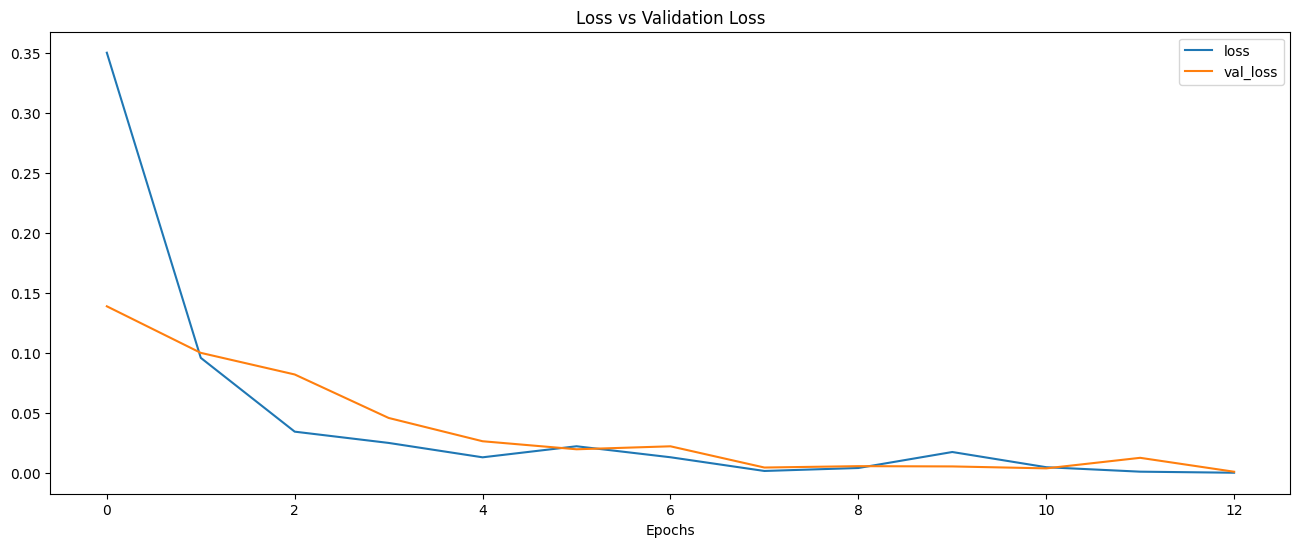

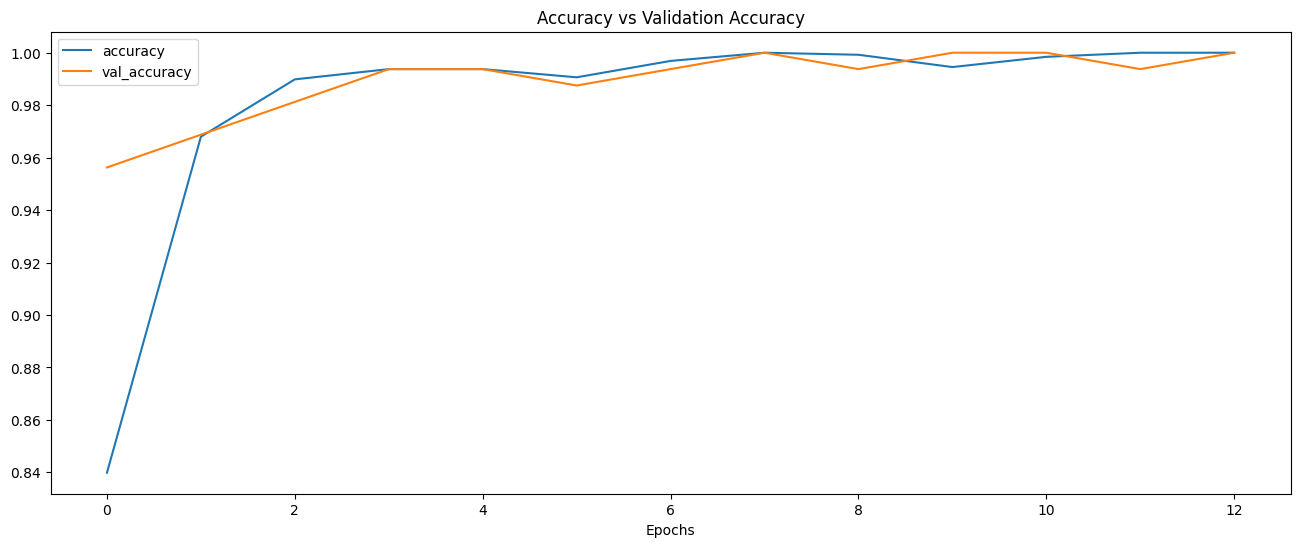

In [81]:
import pandas as pd             
history=pd.DataFrame(hist.history)
history[['loss','val_loss']].plot(title='Loss vs Validation Loss',figsize=(16,6),xlabel='Epochs')
history[['accuracy','val_accuracy']].plot(title='Accuracy vs Validation Accuracy',figsize=(16,6),xlabel='Epochs')
plt.show()

*iv) Model Evaluation*

In [82]:
from tensorflow import keras    
accuracy=keras.metrics.BinaryAccuracy()

In [83]:
for batch in test.as_numpy_iterator():
    X,y=batch    
    y_pred=model.predict(X)
    accuracy.update_state(y,y_pred)
print(f'Accuracy Score : {accuracy.result().numpy()}')

1/1 [==============================] - 0s 361ms/step
Accuracy Score : 0.987500011920929
